## Honour code
On my honour, I pledge that I have neither received nor provided improper assistamce in the completion of this programming assignment. Signed by KIthandi Lincoln Kasengi

# Machine Learning: Programming Assignment 2

Watch the following three videos: `Machine Learning Recipes 3 ~ 5`. In one jupyter notebook, do coding for KMClassifer in Machine Learning Recipes 5 Video. Post your work at Piazza by 24 hours before the next class. Have a reasonably good document of the program as you have seen in my lecture note. 

### Machine Learning Recipes #3 - What Makes a Good Feature?

[Watch and follow instructor Josh Gordon](https://www.youtube.com/watch?v=N9fDIAflCMY&t=2s)

__Classifiers__ are only as good as the feature you provide. __Good features__ are informative, independent and simple. We will briefly discuss what makes a good feature and eventually provide some tips for selecting a good feature.


**Feature Selection**

Feature selection is also called variable selection or attribute selection. It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.
Feature selection methods aid you in your mission to create an accurate predictive model. They help you by choosing features that will give you as good or better accuracy whilst requiring less data.

**What makes a good feature?**

Classifiers are only as good as the features you provide. When doing binary classification, it is very easy to decide a good feature between two different things. For example; if one is to write a classifier to tell the difference between two types of dogs, Greyhound and Labrador. Suppose you use two features; **dog's height** and **eye colour.** Greyhounds tend to be more inches taller that Labradors, but not always. Likewise, the colour of the dogs' eye may not clearly distinguish between Greyhounds and Labradors. So if we create a feature we have to consider how they look for various values in a population.

__Good Features__
- __Avoid useless features:__ They can hurt your classifier's accuracy. For example; using dog's eye colour to distinguish between Greyhounds and Labrdors.
- __Avoid redudant feature:__ Independent features are best. For example; having heights in centimeters and height in  inches as two distinct features would not make any sense.
- __Features should be easy to understand:__ This makes learning process easier. For example; Imagine you want to predict how many days it will take to mail a letter between two different cities. A great feature to use would be the distance between the cities in miles. A much worse pair of features to us would be the cities' locations given by their latitudes and longitudes. This is because learning the relationship latitudes and longitudes is much harder and will require many more examples in your training data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create dog population
greyhounds = 500
labs = 500

In [3]:
# give them height
grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

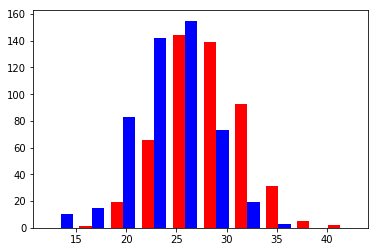

In [4]:
# visualize in histogram
plt.hist([grey_height, lab_height], stacked = False, color = ['r', 'b'])
plt.show()

---------------------------------------------------------------------------------


### Machine Learning Recipes #4 - Let’s Write a Pipeline 

[Watch and follow instructor Josh Gordon](https://www.youtube.com/watch?v=84gqSbLcBFE&t=1s)

In this recipe, we’ll write a basic pipeline for supervised learning with just 12 lines of code. We'll talk about training and testing data, how to train the classifier, and how to call the predict method and use it to classify our testing data. 

__Training and Testing Data__

Before deploying your model, you need to verify that the model works well. One approach is to partition our datasets into two sets; __training__ and __testing__ datasets.

- __Training dataset:__  is the actual dataset that we use to train the model. The model sees and learns from this data.
- __Test Dataset:__  is the data samples used to provide an unbiased evaluation of a final model fit on the training dataset.

__STEP 1__: Import a dataset

Let's import iris datasets into scikit

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

__STEP 2__: Call the features

Let's call the features(samples) X and the labels Y. We use X and Y because a classifier is more of a function.

           f(x) = y

In the above function, y(output/labels) is a function of x(features/samples).

In [6]:
X = iris.data # features
Y = iris.target # labels

__STEP 3__: Partition data to train and test

X_train and Y_train are features/samples and labels for the train dataset, while X_test and Y_test are features/samples and labels for the test dataset respectively. The test_size is specified as 0.5. This means that half of the data will be ised in testing. For example; if you have 150 samples in iris dataset, 75 will be in train dataset and 75 will be used for test dataset.

In [7]:
# partition data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .5)

__STEP 4__: Create a classifier

As earlier explained, a classifier is a function ```f(x) = y``` where f(x) represents features and y is label.
There are two ways of creating a classifier.
- From a decision tree classifier
- From a KNN(K-Nearest Neighbors) classifier

   a) From a decision tree classifier

In [8]:
from sklearn import tree
my_classifier = tree.DecisionTreeClassifier()

   b) Using K-Neighbour classifier

In [9]:

from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()

__STEP 5__: Train the classifier

Train the classifier using training data.

In [10]:
my_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

__STEP 6__: Call predict

Call the predict method and use it to classify our testing data

In [11]:
predictions = my_classifier.predict(X_test)

__STEP 7__: Calculate accuracy

Calculate accuracy by comparing predicted labels to true labels

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, predictions))

0.9466666666666667


In [14]:
# Entire code for Machine Learning Recipe #4 

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data # features
Y = iris.target # labels

# partition data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .5)

#Create a Classifier
#from sklearn import tree
#my_classifier = tree.DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()

#Train the classifier and call predict
my_classifier.fit(X_train, Y_train)
predictions = my_classifier.predict(X_test)

# Calculate accuracy by comparing predicted labels to true labels
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, predictions))

0.9333333333333333




-------------------------------------------
### Machine Learning Recipes #5 - Writing Our First Classifier

[Watch and follow instructor Josh Gordon](https://www.youtube.com/watch?v=AoeEHqVSNOw)

In this recipe, We'll start with our code from episode #4 and comment out the classifier we imported. Then, we'll code up a simple replacement - using a scrappy version of k-Nearest Neighbors. 


__STEP 1__: Comment out imports

Using the code in `machine learning recipe #4`, comment out KNN imports.

In [14]:
# Comment out imports
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data # features
Y = iris.target # labels

# partition data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .5)

#Create a Classifier
#from sklearn import tree
#my_classifier = tree.DecisionTreeClassifier()
#from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()

#Train the classifier and call predict
my_classifier.fit(X_train, Y_train)
predictions = my_classifier.predict(X_test)

# Calculate accuracy by comparing predicted labels to true labels
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, predictions))

0.96


__STEP 2__: Implement a class

Implement a class for our classifier. I call the class __ScrappyKNN()__. Next, change the pipeline to use the __ScrappyKNN()__ class.

In [46]:
# Implement a class for our Classifier
# class ScrappyKNN(): # Class ScrappyKNN implemented
from sklearn import datasets 
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

from sklearn.neighbors import KNeighborsClassifier
my_classifier = ScrappyKNN() # Change pipeline to use the ScrappyKNN() class

my_classifier.fit(X_train, y_train)

predicitions = my_classifier.predict (X_test)

from sklearn.metrics import accuracy_score
print (accuracy_score (y_test, predictions))

0.29333333333333333


__STEP 3__: Understand interface

Let's see what methods we need to implement. Looking for the interface for a classifier, we see there are two we care about; __fit__, which does the training, and __predict__, which does the prediction. 

- __def fit ():__ Takes the features/samples and labels for the training set as input.
- __def predict():__ Receives the features for our testing data and returns predictions to the labels as output.

In [39]:
# Understand interface

class ScrappyKNN():
    def fit(self, X_train, y_train): # declare fit data
        pass
    
    def predict(self, X_test): # declare predict data
        pass
    
from sklearn import datasets 
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

from sklearn.neighbors import KNeighborsClassifier
my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predicitions = my_classifier.predict (X_test)

from sklearn.metrics import accuracy_score
print (accuracy_score (y_test, predictions))

0.3333333333333333


__STEP 4__: Get Pipeline working

To begin, let's write something simpler. We will write a random classifier. To start, add some codes to __fit()__ and __predict()__. Inside the predict(), remember we need to return a list of predictions because the parameter __X_test__ is usually a 2D array or a list of lists. Each row contains features for one testing example. Then randomly pick a label from the training data and append that to our predictions. 

Let's run our code and see how well it does, but remember we have three types of flowers in the iris dataset, so our accuracy should be about 33 percent. But when we started thos exercise, our accuracy was 97 percent, so let's see whether we can improve this by implementing K-Nearest neighbors.

In [40]:
# Get pipeline working

import random

class ScrappyKNN():
    def fit(self, X_train, y_train): # declare fit data
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = random.choice (self.y_train)
            predictions.append(label)
        return predictions
    
from sklearn import datasets 
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict (X_test)

from sklearn.metrics import accuracy_score
print (accuracy_score (y_test, predictions))

0.26666666666666666


__STEP 5__: Introducing K-NN

Let's implement our classifier using K-Nearest neighbors. K-nearest neighbor classifier can hardly be simpler described. This is an old saying, which can be found in many languages and many cultures. It's also metnioned in other words in the Bible: __"He who walks with wise men will be wise, but the companion of fools will suffer harm" (Proverbs 13:20 )__

The principle behind nearest neighbor classification consists in finding a predefined number, i.e. the __'k'__ - of training samples closest in distance to a new sample, which has to be classified. The label of the new sample will be defined from these neighbors. k-nearest neighbor classifiers have a fixed user defined constant for the number of neighbors which have to be determined.

__Determining the neighbors__

To determine the similarity between two instances, we need a distance function.In our example, we use the Euclidean distance.

__STEP 6__: Measure distance

We can measure distance using Euclidean distance. __Euclidean distance__ is just a distance measure between a pair of samples __a__ and __b__ in an n-dimensional feature space. 

Let's define Euclidean distance in our code.

In [41]:
# Using Euclidean distance

from scipy.spatial import distance

def euc(a, b):
        return distance.euclidean(a, b)
    
class ScrappyKNN():
    def fit(self, X_train, y_train): # declare fit data
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = random.choice (self.y_train)
            predictions.append(label)
        return predictions
    
from sklearn import datasets 
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict (X_test)

from sklearn.metrics import accuracy_score
print (accuracy_score (y_test, predictions))

0.37333333333333335


__STEP 7__: Implement nearest neighbor algorithm

To make a prediction for a test point, we calculate the distance of all the training points, then we will predict the testing point as the same label as the closest one.

In [42]:
# Implement K-NN algorithm 

from scipy.spatial import distance

def euc(a, b):
        return distance.euclidean(a, b)
    
class ScrappyKNN():
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for index, X_train_row in enumerate(self.X_train):
            dist = euc(row, X_train_row)
            if dist < best_dist:
                best_dist = dist
                best_index = index
        return self.Y_train[best_index]

__STEP 8__: Run Pipeline

Let's now run the pipeline. When you run it, you'll notice that the accuracy is over 90 percent and may vary ecause of the randomness in the train and test split. 

In [43]:
# Run the pipeline

from scipy.spatial import distance

def euc(a, b):
        return distance.euclidean(a, b)
    
class ScrappyKNN():
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for index, X_train_row in enumerate(self.X_train):
            dist = euc(row, X_train_row)
            if dist < best_dist:
                best_dist = dist
                best_index = index
        return self.Y_train[best_index]
    
    from sklearn import datasets 
iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict (X_test)

from sklearn.metrics import accuracy_score
print (accuracy_score (y_test, predictions))

0.96


### Summary

- __KNN (K nearest neighbor)__ is based on minimum distance (for example Euclidean distance) from the query instance to the training samples to determine the K-nearest neighbors. After you gather K nearest neighbors, you take simple majority of these K-nearest neighbors to be the prediction of the query instance.

__Pros:__
 - relatively simple,
 - working well for some problems.
 
__Cons:__
 - computationally intensive,
 - hard to represent relationships between features.

----------
__For the commandments, “You shall not commit adultery, You shall not murder, You shall not steal, You shall not covet,” and any other commandment, are summed up in this word: “You shall love your neighbor as yourself.__ Romans 13:9

----------------------